In [46]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

activities_file_name = os.path.join("activities.csv")
activities_file_name

plt.style.use("classic")
plt.figure(figsize=(7.5, 4.25))

# Data cleanup
activities = pd.read_csv(activities_file_name, index_col=0)
activities.rename(columns={'Activity Date': 'activity_date', 'Activity Type': 'activity_type', 'Elapsed Time': 'elapsed_time'}, inplace=True)
activities["Distance"] = pd.to_numeric(activities["Distance"], errors="coerce")
activities['activity_date'] = pd.to_datetime(activities['activity_date'], format="%b %d, %Y, %I:%M:%S %p")

# Convert seconds to hours
activities["time_in_hours"] = activities['elapsed_time'].div(3600)

# Organising by date

index_2019 = (activities['activity_date'] > pd.Timestamp(2019, 1, 1)) & (activities['activity_date'] < dt.datetime.today())
index_1819 = (activities['activity_date'] > pd.Timestamp(2018, 9, 1)) & (activities['activity_date'] < pd.Timestamp(2019, 2, 28))
index_2018 = (activities['activity_date'] > pd.Timestamp(2018, 1, 1)) & (activities['activity_date'] < pd.Timestamp(2018, 12, 31))
index_2017 = (activities['activity_date'] > pd.Timestamp(2017, 1, 1)) & (activities['activity_date'] < pd.Timestamp(2017, 12, 31))

activities_2019 = activities[index_2019]
activities_2018 = activities[index_2018]
activities_2017 = activities[index_2018]
vasaloppet2019_training = activities[index_1819]

# totalling Vasaloppet 2019 training
grouped_activities = vasaloppet2019_training.groupby("activity_type")
totals = grouped_activities.sum()

<Figure size 600x340 with 0 Axes>

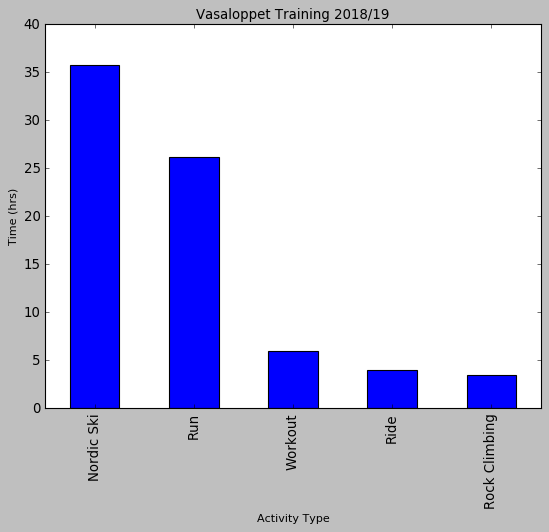

In [51]:



# plotting a bar chart
# total_distances = totals.iloc[:,1]
# total_distances.sort_values(ascending=True).plot(kind="barh")
# plt.xlabel("Distance km", fontsize=10)
# plt.ylabel("Activity Type", fontsize=10)
# plt.title("Total Distance Per Activity", fontsize=12)


# distances_and_times = pd.DataFrame({"time_elapsed": totals['time_in_hours'], "distance": totals['Distance']})
# distances_and_times.sort_values(by=["distance", "time_elapsed"]).plot(kind="bar")
totals['time_in_hours'].sort_values(ascending=False).plot(kind="bar")
plt.title("Vasaloppet Training 2018/19", fontsize=12)
plt.xlabel("Activity Type", fontsize=10)
plt.ylabel("Time (hrs)", fontsize=10)

plt.savefig("Vasaloppet2019_training.png")
plt.show()